---
# **Desafio - Vaga de Estágio Driva**
## **Candidato: Jayor Nesi Teixeira**
### **Engenharia de Computação - Universidade Federal de Santa Catarina**

---



*   Leia o arquivo "DadosEmpresa.csv";
*   Leia o arquivo "DadosEndereco.csv";
*   Gere um arquivo csv com todas as empresas que tem opção_pelo_simples como SIM;
*   Gere outro arquivo csv que contenha todas as informações das empresas que são de Curitiba ou de Londrina e que tenham capital social maior que 5000 reais.
*   Faça um gráfico que mostre o total de empresas em cada bairro de Curitiba. (utilize uma biblioteca de sua escolha);
*   Observando os dois arquivos, qual outra analise de dados você faria? Implemente ela e escreva em um comentário o porque pensou nela.


---
# **Hands-on**


#####**Importando a biblioteca Pandas:**

In [1]:
import pandas as pd

#####**1) Leia o arquivo "DadosEmpresa.csv"**

In [2]:
df_Empresa = pd.read_csv('DadosEmpresa.csv')

#imprime as 5 primeiras linhas da tabela:
df_Empresa.head()

,cnpj,raiz_cnpj,matriz_filial,razao_social,opcao_pelo_simples,capital_social
0,126195000110,126195,MATRIZ,TRAMA SOFTWARE LTDA,NAO,0
1,155991000181,155991,MATRIZ,ELEKTI - APOIO A EDUCACAO E FORNECIMENTO DE BO...,NAO,40000
2,321106000197,321106,MATRIZ,VIRTUAL TECNOLOGIA & SERVICOS LTDA,NAO,5000
3,358376000172,358376,MATRIZ,SARTOR ASSESSORIA E COMERCIO DE INFORMATICA LTDA,SIM,0
4,563375000160,563375,MATRIZ,INDEXX INFORMATICA LTDA,SIM,0


#####**2) Leia o arquivo "DadosEndereco.csv"**

In [3]:
df_Endereco = pd.read_csv('DadosEndereco.csv')

#imprime as 5 primeiras linhas da tabela:
df_Endereco.head()

,cnpj,bairro,municipio
0,126195000110,BIGORRILHO,CURITIBA
1,155991000181,CENTRO,LAPA
2,321106000197,PRIMAVERA,NOVO HAMBURGO
3,358376000172,SAO PELEGRINO,CAXIAS DO SUL
4,563375000160,CENTRO,TRES COROAS


#####**3) Gere um arquivo csv com todas as empresas que tem opção_pelo_simples como SIM**

In [4]:
#filtrando o dataframe original
df_simples_sim = df_Empresa.loc[df_Empresa['opcao_pelo_simples']=='SIM']

#exportando o dataframe pandas para um arquivo csv:
df_simples_sim.to_csv('simples_sim.csv', index = 'FALSE')

df_simples_sim.head()

,cnpj,raiz_cnpj,matriz_filial,razao_social,opcao_pelo_simples,capital_social
3,358376000172,358376,MATRIZ,SARTOR ASSESSORIA E COMERCIO DE INFORMATICA LTDA,SIM,0
4,563375000160,563375,MATRIZ,INDEXX INFORMATICA LTDA,SIM,0
5,586312000129,586312,MATRIZ,DATAMICRO SISTEMAS LTDA,SIM,0
6,587384000190,587384,MATRIZ,INOVATIVA INFORMATICA LTDA,SIM,0
10,841331000154,841331,MATRIZ,SOFTNEW SISTEMAS E CONSULTORIA EM INFORMATICA ...,SIM,15000


#####**4) Gere outro arquivo csv que contenha todas as informações das empresas que são de Curitiba ou de Londrina e que tenham capital social maior que 5000 reais.**


In [5]:
#Antes de tudo faremos um merge dos dois arquivos csv pela coluna csv, 
# a fim de ter todas as informações em um único lugar
df_merged = pd.merge(df_Empresa, df_Endereco, how='inner', on='cnpj')

df_merged.head()

,cnpj,raiz_cnpj,matriz_filial,razao_social,opcao_pelo_simples,capital_social,bairro,municipio
0,126195000110,126195,MATRIZ,TRAMA SOFTWARE LTDA,NAO,0,BIGORRILHO,CURITIBA
1,155991000181,155991,MATRIZ,ELEKTI - APOIO A EDUCACAO E FORNECIMENTO DE BO...,NAO,40000,CENTRO,LAPA
2,321106000197,321106,MATRIZ,VIRTUAL TECNOLOGIA & SERVICOS LTDA,NAO,5000,PRIMAVERA,NOVO HAMBURGO
3,358376000172,358376,MATRIZ,SARTOR ASSESSORIA E COMERCIO DE INFORMATICA LTDA,SIM,0,SAO PELEGRINO,CAXIAS DO SUL
4,563375000160,563375,MATRIZ,INDEXX INFORMATICA LTDA,SIM,0,CENTRO,TRES COROAS


In [8]:
#filtrando o dataframe para a cidade de CURITIBA:
df_curitiba = df_merged.loc[(df_merged['municipio']=='CURITIBA') & (df_merged['capital_social'] > 5000)]

#filtrando o dataframe para a cidade de LONDRINA:
df_londrina = df_merged.loc[(df_merged['municipio']=='LONDRINA') & (df_merged['capital_social'] > 5000)]

#merge dos dataframes filtrados:

df_final = pd.merge(df_curitiba, df_londrina, how='outer')


#exportando o dataframe pandas para um arquivo csv:
df_final.to_csv('df_final.csv', index = 'FALSE')

#####**5) Faça um gráfico que mostre o total de empresas em cada bairro de Curitiba**

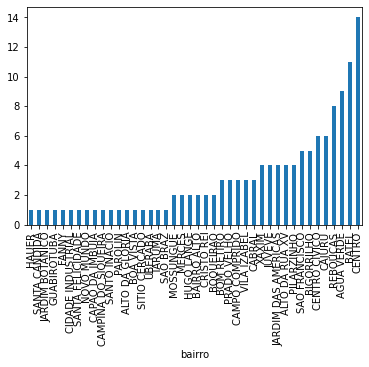

In [14]:
df_curitiba.groupby(['bairro']).municipio.count().sort_values().plot(kind='bar')

#####**6) Observando os dois arquivos, qual outra analise de dados você faria? Implemente ela e escreva em um comentário o porque pensou nela.**

In [27]:
#vamos obter as 3 empresas com maior capital social que optaram e que não optaram pelo simples, para ver se há relação
#entre a opção com o valor do capital social ser alto ou baixo

#aproveitando o dataframe já obtido das que optaram pelo simples:
df_simples_sim.sort_values(by=['capital_social'], ascending=False).head(3)

,cnpj,raiz_cnpj,matriz_filial,razao_social,opcao_pelo_simples,capital_social
571,33067005000190,33067005,MATRIZ,DALMIR CONSULTORIA EM TECNOLOGIA DA INFORMACAO...,SIM,1100000
276,13612744000109,13612744,MATRIZ,PLIGG CONSULTORIA EM TECNOLOGIA DA INFORMACAO ...,SIM,1000000
482,29309746000163,29309746,MATRIZ,GO4 TECNOLOGIA DA INFORMACAO LTDA,SIM,960000


In [28]:
#agora vamos aos que não optaram pelo simples:
df_simples_nao = df_Empresa.loc[df_Empresa['opcao_pelo_simples']=='NAO']

df_simples_nao.sort_values(by=['capital_social'], ascending=False).head(3)

,cnpj,raiz_cnpj,matriz_filial,razao_social,opcao_pelo_simples,capital_social
99,5337875000105,5337875,MATRIZ,NEOWAY TECNOLOGIA INTEGRADA ASSESSORIA E NEGOC...,NAO,113860009
67,4121834000106,4121834,MATRIZ,MACNICA DHW LTDA,NAO,21350251
576,33332029000120,33332029,MATRIZ,INTERGALAXY HOLDINGS SA,NAO,12575391


#####Podemos observar que as empresas que não optaram pelo simples tem um capital social muito mais elevado comparado aos que optaram pelo simples.